Project: Prediction mean values and exceeding limit days of fine Particulate Matter (PM2.5) in the air - Milan (Italy).

Student: **Alessandro Monolo** | 1790210

Lecturer: Jonas Moons

Fundamentals of Machine Learning - Master Data-Driven Design, Hogeschool Utrecht.

August 2021 - Block E

# k-Nearest Neighbors model

### KNN model for the prediction of days where the concentration of fine Particulate Matter (PM 2.5) exceed daily limits.

**Harmful day is when the PM2.5 is > 25µg/m³**

*KNN Algorithm works to predict a classification variable, therefore not a quantitative variable but rather a categorical variable, yes or not for instance.
This works thanks to the so-called neighbors values;
The most common values per each datapoint, thanks to their means, it predicts the outcome.*

In this case, KNN is called to predict whether a day, due to particular circumstances, exceeded or not the daily thresholds.
Particular circumstances in this case are represented by the daily mean concentration values of certain harmful elements in the air, atmospheric trend and atmospheric phenomenon, such as rain, fog, snow and sultriness, which can affect the level of pollution in the air, as I previously shown by the data exploration and visualization phases.

In [37]:
import seaborn as sns
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math
import numpy as np

In [38]:
df_Milan = pd.read_csv('Milan_Final_Dataframe_2014_2019.csv')

In [39]:
df_Milan.head(10)

,Day_of_Week,Weekend_Day,Month,Season,PM2.5 µg/m³,Over_PM25_Limit,NO µg/m³,NO2 µg/m³,CO mg/m³,O µg/m³,Mean_Temperature_°C,Humidity_Level_%,Mean_Windspeed_km/h,ATM_Pressure,ATM_Phenom_Fog,ATM_Phenom_Snow,ATM_Phenom_Rain,ATM_Phenom_Sultriness
0,2,0,1,1,128.0,1,253.6,80.1,2.0,7.3,2.0,89.0,3.0,1020.0,1,0,1,0
1,3,0,1,1,39.0,1,145.9,70.5,1.4,6.4,3.0,99.0,6.0,1018.0,0,0,1,0
2,4,0,1,1,45.0,1,117.6,54.2,1.4,6.0,4.0,96.0,8.0,1021.0,0,0,1,0
3,5,1,1,1,30.0,1,128.8,52.4,1.5,5.6,5.0,99.0,6.0,1015.0,1,0,1,0
4,6,1,1,1,19.0,0,123.5,53.8,1.5,6.7,6.0,98.0,6.0,1007.0,1,0,1,0
5,0,0,1,1,38.0,1,242.1,69.1,2.1,6.1,5.0,96.0,4.0,1020.0,1,0,0,1
6,1,0,1,1,56.0,1,306.9,83.1,2.3,5.8,5.0,94.0,4.0,1025.0,1,0,0,1
7,4,0,1,1,54.0,1,276.9,78.7,2.2,6.0,9.0,90.0,5.0,1019.0,0,0,1,1
8,5,1,1,1,57.0,1,186.2,62.1,1.9,5.5,9.0,94.0,6.0,1022.0,0,0,1,0
9,0,0,1,1,36.0,1,108.4,51.3,1.6,6.7,5.0,100.0,7.0,1019.0,1,0,1,0


<Figure size 1224x432 with 0 Axes>

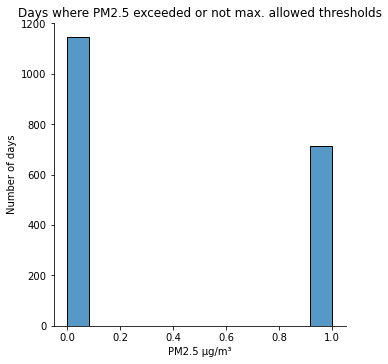

In [40]:
plt.figure(figsize=(17,6))
sns.displot(df_Milan['Over_PM25_Limit'])
plt.title('Days where PM2.5 exceeded or not max. allowed thresholds')
plt.xlabel('PM2.5 µg/m³')
plt.ylabel('Number of days')
plt.show()

### Set the numerical variable (CO mg/m³) using the same unit of measure of the others (µg/m³)

In [41]:
df_Milan['CO µg/m³'] = df_Milan['CO mg/m³'] * 1000

In [42]:
df_Milan.drop('CO mg/m³', axis=1, inplace=True)

### Data visualization of correlations between indipendent variables and the dependent variable (over_PM25_Limit)

Here I plot the correlations between each numerical variable present into my datasetusing a heatmap.
Furthermore, I use annot=True to see immediately and clearly the value of its correlation.

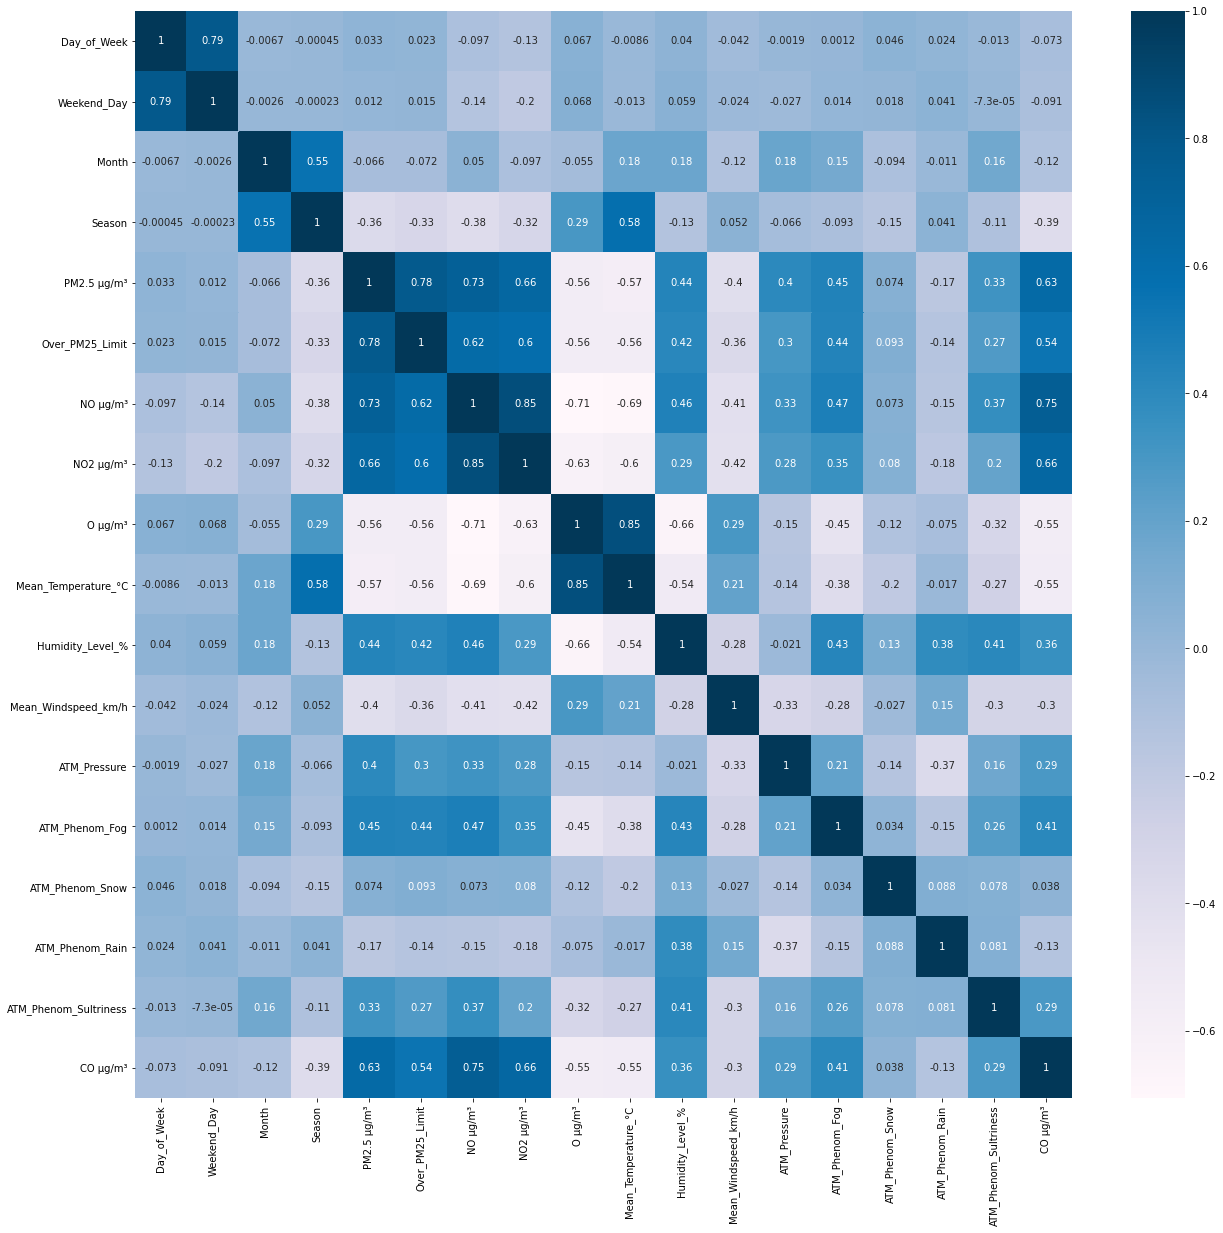

In [43]:
plt.figure(figsize=(21,20))
sns.heatmap(df_Milan.corr(), annot=True, cmap='PuBu')
plt.show()

# Standardize the Variables

*Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.*

**Import StandardScaler from Scikit learn.**

In [44]:
from sklearn.preprocessing import StandardScaler

Create the new data frame with all the indipendent variables I need.

**Here I set which indipendent variables compose X that I will use to train the KNN model**

In [45]:
# First attempt KNN: acc= 84% (k=27), prediction 0: 0.94, 0.98, 0.96 - prediction 1: 0.80, 0.75, 0.77.
df_to_scale = df_Milan[['Day_of_Week', 'NO µg/m³', 'NO2 µg/m³', 'CO µg/m³', 'Humidity_Level_%', 'ATM_Pressure', 'ATM_Phenom_Fog', 'ATM_Phenom_Sultriness']]

In [46]:
# Second attempt KNN: acc= 84% (k=6), prediction 0: 0.84, 0.92, 0.88 - prediction 1: 0.83, 0.69, 0.76.
# df_to_scale = df_Milan[['NO µg/m³', 'NO2 µg/m³', 'CO µg/m³', 'ATM_Pressure', 'ATM_Phenom_Fog', 'ATM_Phenom_Sultriness', 'Humidity_Level_%']] 

In [47]:
# Third attempt KNN: acc= 83% (k=26), prediction 0: 0.85, 0.89, 0.87 - prediction 1: 0.80, 0.72, 0.76.
# df_to_scale = df_Milan[['NO µg/m³', 'NO2 µg/m³', 'CO µg/m³', 'ATM_Pressure', 'ATM_Phenom_Fog', 'ATM_Phenom_Sultriness', 'Humidity_Level_%','Mean_Windspeed_km/h']] 

In [48]:
# Fourth attempt KNN: acc= 83% (k=30), prediction 0: 0.85, 0.90, 0.87 - prediction 1: 0.80, 0.72, 0.76.
# df_to_scale = df_Milan[['Day_of_Week', 'NO µg/m³', 'NO2 µg/m³', 'CO µg/m³', 'Humidity_Level_%', 'ATM_Pressure', 'ATM_Phenom_Fog', 'ATM_Phenom_Sultriness']] 

**Create a StandardScaler() object called scaler.**

In [49]:
scaler = StandardScaler()

**Fit scaler to the features.**

In [50]:
scaler.fit(df_to_scale)

StandardScaler()

**Use the .transform() method to transform the features to a scaled version.**

In [51]:
scaled_features = scaler.transform(df_to_scale)

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [52]:
df_knn = pd.DataFrame(scaled_features, columns=df_to_scale.columns)

In [53]:
df_knn.head()

,Day_of_Week,NO µg/m³,NO2 µg/m³,CO µg/m³,Humidity_Level_%,ATM_Pressure,ATM_Phenom_Fog,ATM_Phenom_Sultriness
0,-0.513556,2.218742,1.453861,2.397295,1.043070,0.537726,1.637433,-0.293026
1,-0.015798,0.632499,0.923764,0.895417,1.663354,0.271086,-0.610712,-0.293026
2,0.481961,0.215687,0.023703,0.895417,1.477269,0.671046,-0.610712,-0.293026
3,0.979719,0.380645,-0.075690,1.145730,1.663354,-0.128873,1.637433,-0.293026
4,1.477477,0.302585,0.001616,1.145730,1.601325,-1.195432,1.637433,-0.293026


### Training a Linear Regression Model

The goal here is to predict if wether or not a day exceed the PM2.5 daily limit.

In [54]:
X = df_knn

And Y as my prediction goal:

In [55]:
y = df_Milan['Over_PM25_Limit']

In [56]:
from sklearn.model_selection import train_test_split

Test_size = % of data which are allocated as test size, therefore in this case will be the 40% of my dataset.

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [58]:
from sklearn.neighbors import KNeighborsClassifier

**Create a KNN model instance with n_neighbors=1**

In [59]:
knn = KNeighborsClassifier(n_neighbors=1)

**Fit this KNN model to the training data.**

In [60]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

# Predictions and Evaluations

Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [61]:
Predictions = knn.predict(X_test)

In [62]:
Predictions

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,

**Create a confusion matrix.**

In [63]:
from sklearn.metrics import confusion_matrix

In [64]:
cm1 = confusion_matrix(y_test, Predictions) #creates a "confusion matrix"
cm1 = pd.DataFrame(cm1, index=['No harmful day (actual)', 'Harmful day (actual)'], columns = ['No harmful day (pred)', 'Harmful day (pred)']) #label and make df
cm1 # print KNN model confusion matrix

,No harmful day (pred),Harmful day (pred)
No harmful day (actual),286,67
Harmful day (actual),59,146


**Create a classification report.**

In [65]:
from sklearn.metrics import classification_report

In [66]:
print(classification_report(y_test, Predictions))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       353
           1       0.69      0.71      0.70       205

    accuracy                           0.77       558
   macro avg       0.76      0.76      0.76       558
weighted avg       0.78      0.77      0.78       558



# Choosing the best K Value
Now I will use the elbow method to pick the best K Value

**Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list.**

In [67]:
error_rate = []

In [68]:
for i in range(1,60):
    
    knn = KNeighborsClassifier(n_neighbors=i) 
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

**Now create the following plot using the information from your for loop.**

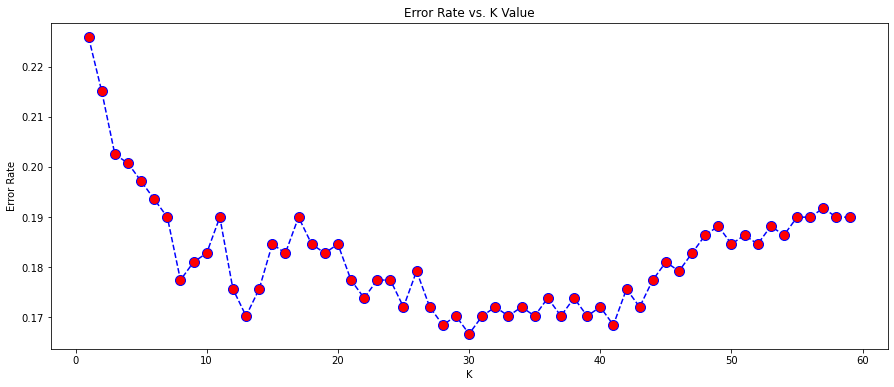

In [69]:
plt.figure(figsize=(15,6)) 

plt.plot(range(1,60), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

## Retrain with the new (best) K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [79]:
knn = KNeighborsClassifier(n_neighbors=30)

knn.fit(X_train,y_train)
Predictions = knn.predict(X_test)

print('\n')
print('The confusion matrix with K=30: \n', confusion_matrix(y_test, Predictions))
print('\n')
print('The classification report with K=30: \n', classification_report(y_test, Predictions))



The confusion matrix with K=30: 
 [[317  36]
 [ 57 148]]


The classification report with K=30: 
               precision    recall  f1-score   support

           0       0.85      0.90      0.87       353
           1       0.80      0.72      0.76       205

    accuracy                           0.83       558
   macro avg       0.83      0.81      0.82       558
weighted avg       0.83      0.83      0.83       558



### Evaluation

##### Precision (harmful days)
Precision and Recall can only be calculated for an outcome (harmful days in this case), not for an entire variable (unlike accuracy).

This is the number of correctly predicted harmful days, divided by the total number of predicted harmful days.

How "precise" am I in saying days are harmful?

##### $Precision = \frac{148}{148 + 36} = 80 % $ % 

##### Recall (harmful days)
This is the number of correctly predicted harmful days, divided by the total number of actual harmful days.

Therefore, how many harmful days do I "recall"?

##### $Recall = \frac{148}{148 + 57} = 72 % $ %

## Plot the distribution of probabilities

In [76]:
y_pred_prob = knn.predict_proba(X_test) # Instead of classes, I now get the probabilities

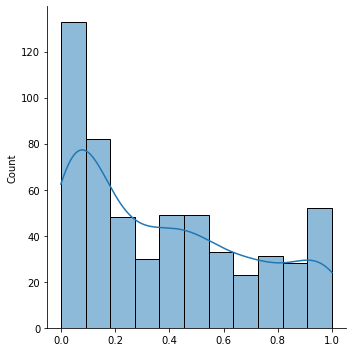

In [77]:
harmful_days_prob = y_pred_prob[:,1] 
sns.displot(harmful_days_prob, kde=True)
plt.show()

Despite the model with this combination of indpipendent variables gives the best performance, the predictions distribution tends to be modal with a long skew on the right which mean the model is overfitted.

## Conclusion

The best performance acquired using KNN as prediction model is adopting as indipendent variables the following combination:

- **'Day_of_Week'**: From the data visualizations, pollution in the air depends on the day of the week (weekend days are less polluted);


- **'NO µg/m³', 'NO2 µg/m³', 'CO mg/m³'**: The trend of these three harmful elements represents a critical index to be taken into consideration for the pollution trend, having essential correlations with the concentration of fine particulate matter 2.5 in the air and representing three of the most polluting elements present in the air;


- **'Humidity_Level_%'**: The humidity level in the air is an essential factor to consider because the moisture acts as glue for the polluting particles present in the atmosphere, reducing their volatility and densifying their concentration, thus being thicker the amount 'of fine dust during very humid days;


- **'ATM_Pressure'**: High correlation with the dependent variable;


- **'ATM_Phenom_Fog', 'ATM_Phenom_Sultriness'**: Sultriness and fog represent two important climatic factors for the city of Milan, which often sees these two phenomena manifest themselves in its area, as shown by the previous views. During the days with the aforementioned atmospheric phenomena, pollution tends to remain close to the ground, thus increasing the risk and harmfulness for the population.

Whith an accuracy equal to 83% , adopting as best n_neighbors:30;
Prediction 0: 0.94, 0.98, 0.96;
Prediction 1: 0.80, 0.72, 0.77.

### Comparison with Random Forest model:

Random Forest model had only 79 mispredicted rows in total.
Here, with KNN model I have 93 uncorrectly values.

Furthermore with Random Forest, I reached a precision performance of 83% and a recall performance of 79%, while here both decrease in effiency (80% and 72%).

Finally, in this case into X I also included days of the week as variable, while for Random Forest, without it I obtained better performances.